In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

# Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


10-fold Cross-Validation Accuracy Scores for Logistic Regression: [0.85416667 0.84375    0.86315789 0.81052632 0.82105263 0.82105263
 0.77894737 0.83157895 0.73684211 0.83157895]
Average CV Score: 0.819265350877193
Training Accuracy: 0.825
Test Accuracy: 0.861
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

Confusion Matrix:
 [[ 90  17]
 [ 16 115]]


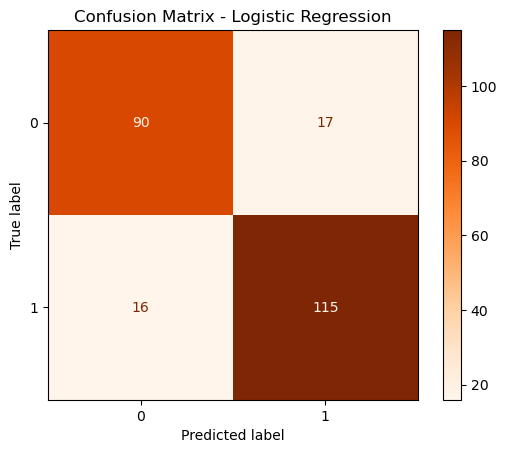

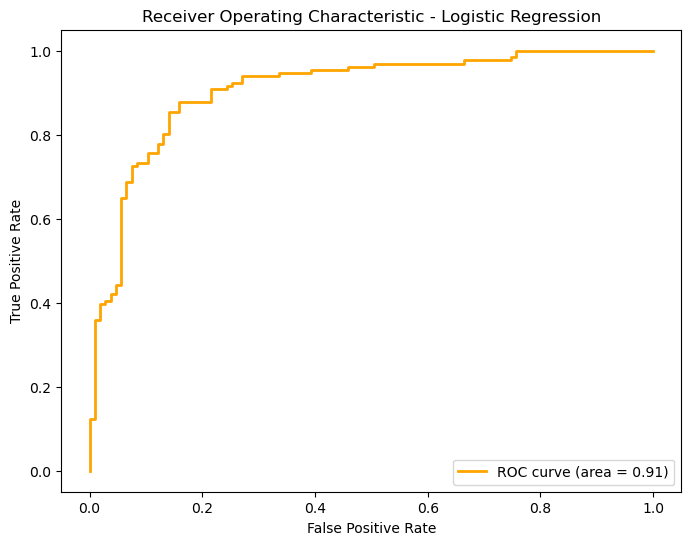

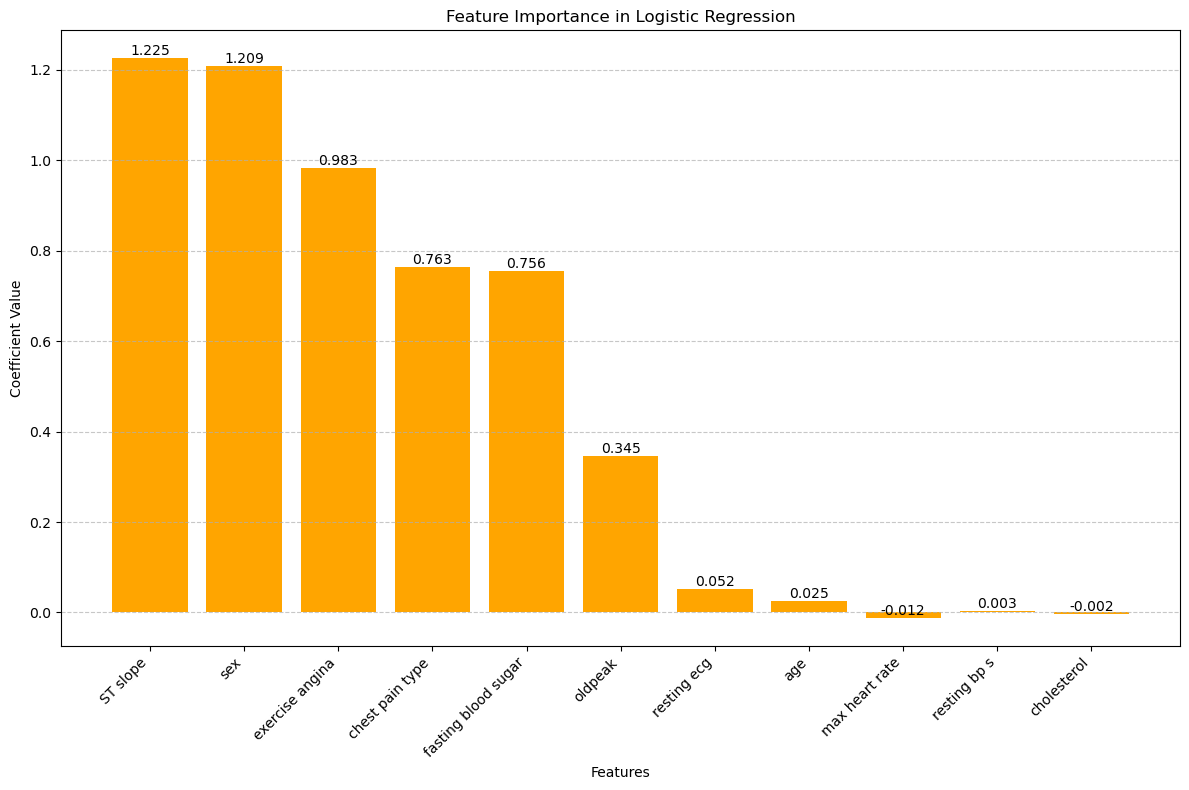

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model with a high iteration limit to ensure convergence
logistic_model = LogisticRegression(max_iter=5000)

# Perform 10-fold cross-validation and print the accuracy scores to evaluate stability and generalization
cross_val_scores = cross_val_score(logistic_model, X_train, y_train, cv=10)
print("10-fold Cross-Validation Accuracy Scores for Logistic Regression:", cross_val_scores)
print("Average CV Score:", cross_val_scores.mean())

# Fit the logistic regression model on the full training dataset
logistic_model.fit(X_train, y_train)

# Making predictions on the test dataset
logistic_predictions = logistic_model.predict(X_test)

# Calculate training and test accuracy
train_accuracy = logistic_model.score(X_train, y_train)
test_accuracy = logistic_model.score(X_test, y_test)

# Print accuracy results
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Evaluate the model using classification report for precision, recall, and f1-score
# and confusion matrix to see the number of correct and incorrect predictions
print("Classification Report:\n", classification_report(y_test, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))

# Visualizing the confusion matrix with heatmap
disp = ConfusionMatrixDisplay.from_predictions(y_test, logistic_predictions, cmap=plt.cm.Oranges)
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/Confusion Matrix/Logistic Regression Model')
plt.show()

# Calculate and plot ROC curve to evaluate the model's ability to discriminate between classes
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/ROC Curve/Logistic Regression Model')
plt.show()

# Extract and visualize feature importance from the logistic regression coefficients
feature_names = X_train.columns  # Assumes X_train is a DataFrame
coefficients = logistic_model.coef_[0]
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])
feature_importance['abs_value'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('abs_value', ascending=False)

# Visualizing Feature Importance with Value Labels
plt.figure(figsize=(12, 8))
bars = plt.bar(feature_importance.index, feature_importance['Coefficient'], color='orange')

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  

plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/Feature Importance/Logistic Regression Model')
plt.show()


10-fold Cross-Validation Accuracy Scores for Random Forest: [0.91666667 0.91666667 0.90526316 0.87368421 0.87368421 0.87368421
 0.86315789 0.84210526 0.84210526 0.85263158]
Average CV Score: 0.8759649122807017
Training Accuracy: 0.940
Test Accuracy: 0.916
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       107
           1       0.90      0.95      0.93       131

    accuracy                           0.92       238
   macro avg       0.92      0.91      0.91       238
weighted avg       0.92      0.92      0.92       238

Confusion Matrix:
 [[ 93  14]
 [  6 125]]


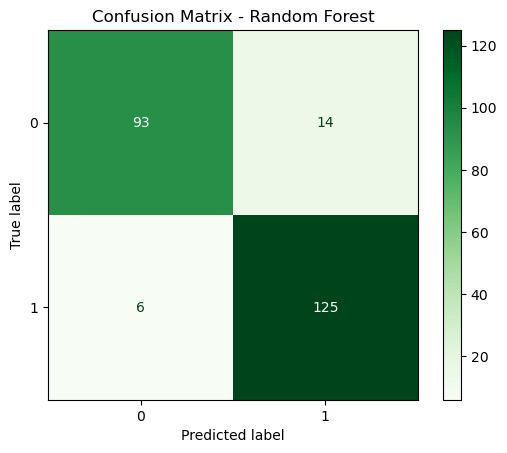

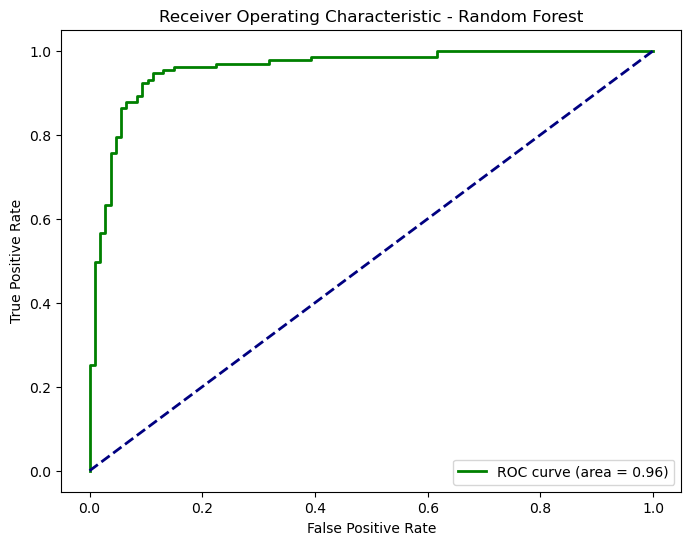

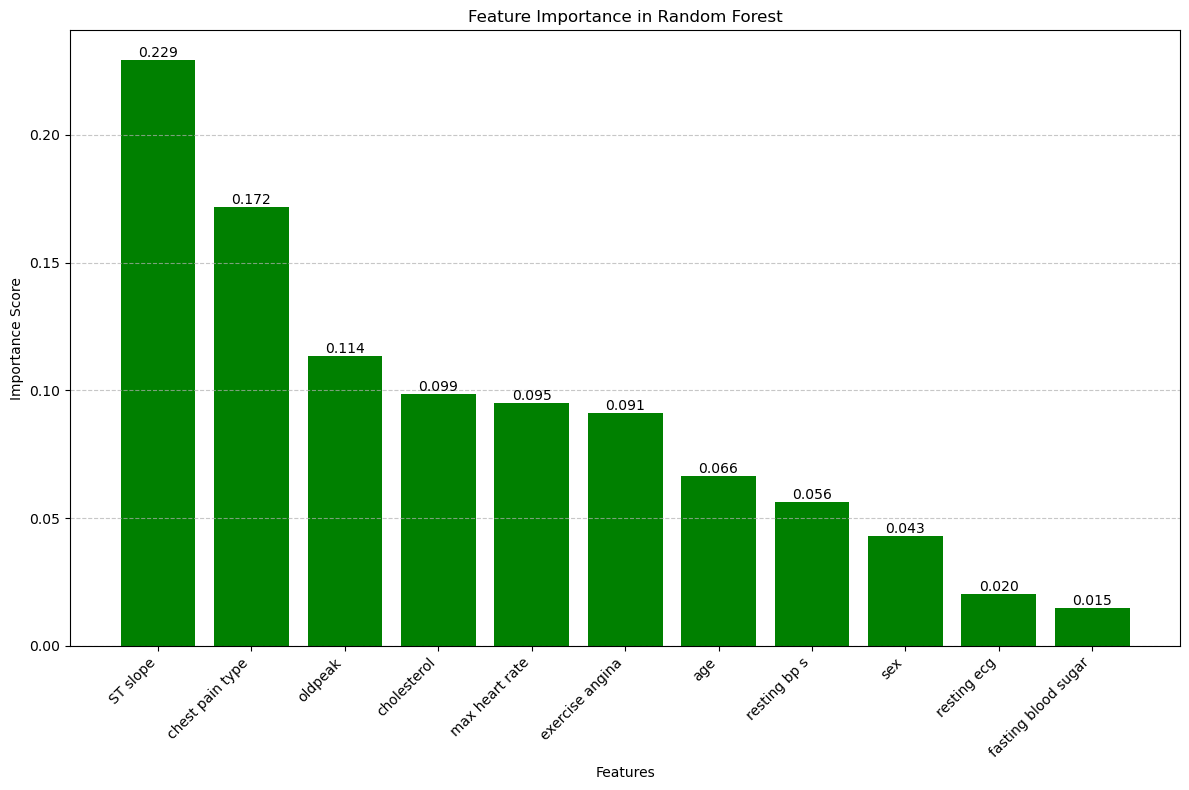

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Initialize the Random Forest Classifier with anti-overfitting settings
forest_model = RandomForestClassifier(
    n_estimators=50,            # Reduce number of trees to prevent excessive complexity
    max_depth=10,               # Limit tree depth to prevent overfitting
    min_samples_split=10,       # A node must have at least 10 samples before splitting
    min_samples_leaf=5,         # A leaf must have at least 5 samples
    max_features='sqrt',        # Use sqrt(number of features) for best generalization
    bootstrap=True,             # Use bootstrapping to improve generalization
    random_state=42             # Ensure reproducibility
)

# Perform 10-fold cross-validation to evaluate model stability
cross_val_scores = cross_val_score(forest_model, X_train, y_train, cv=10)
print("10-fold Cross-Validation Accuracy Scores for Random Forest:", cross_val_scores)
print("Average CV Score:", cross_val_scores.mean())

# Fit the model on the full training dataset
forest_model.fit(X_train, y_train)

# Making predictions on the test dataset
forest_predictions = forest_model.predict(X_test)

# Calculate training and test accuracy
train_accuracy = forest_model.score(X_train, y_train)
test_accuracy = forest_model.score(X_test, y_test)

# Print accuracy results
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Evaluate the model using classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, forest_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, forest_predictions))

# Visualizing the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, forest_predictions, cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Random Forest')
plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/Confusion Matrix/Random Forest Classifier')
plt.show()

# Calculate and plot ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, forest_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/ROC Curve/Random Forest Classifier')
plt.show()

# Extract and visualize feature importance from the Random Forest model
feature_names = X_train.columns  # Assuming X_train is a DataFrame
feature_importance = pd.DataFrame(forest_model.feature_importances_, index=feature_names, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)  # Sorting in descending order

# Visualizing Feature Importance with Value Labels
plt.figure(figsize=(12, 8))
bars = plt.bar(feature_importance.index, feature_importance['Importance'], color='green')

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.title('Feature Importance in Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  

plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/Feature Importance/Random Forest Classifier')
plt.show()


Best k found: 13
10-fold Cross-Validation Accuracy Scores for KNN: [0.78125    0.80208333 0.77894737 0.76842105 0.69473684 0.77894737
 0.70526316 0.81052632 0.70526316 0.69473684]
Average CV Score: 0.7520175438596491
Training Accuracy: 0.771
Test Accuracy: 0.773
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       107
           1       0.78      0.82      0.80       131

    accuracy                           0.77       238
   macro avg       0.77      0.77      0.77       238
weighted avg       0.77      0.77      0.77       238

Confusion Matrix:
 [[ 77  30]
 [ 24 107]]


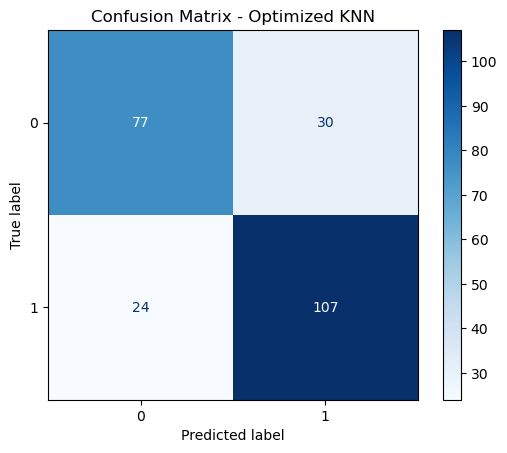

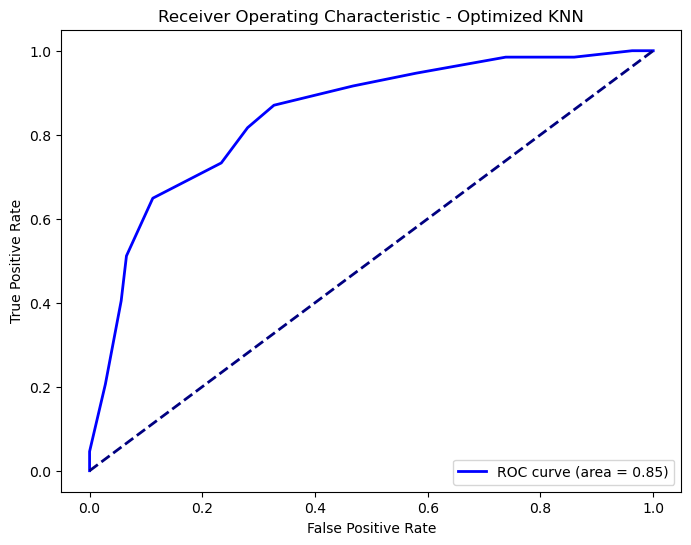

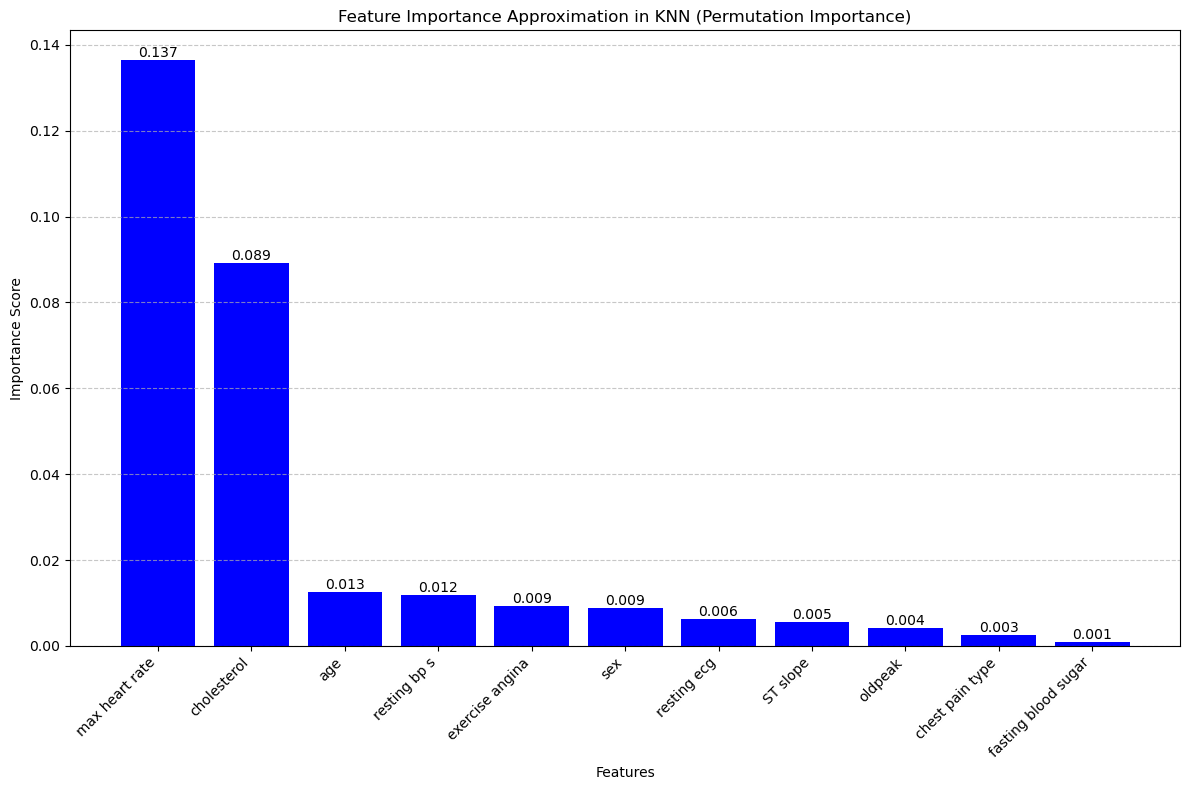

In [27]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Find the Best 'k' to Prevent Overfitting & Underfitting
k_values = list(range(7, 14, 2))  # Odd values from 7 to 13 to prevent ties
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=1)  # Euclidean distance
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cv_scores.append(scores.mean())

# Find the best k (Avoids k=1 to prevent overfitting)
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k found: {best_k}")

# Initialize KNN with Optimal Hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=best_k, weights='uniform', p=1)  # Uses uniform weighting

# Perform 10-fold cross-validation to evaluate model stability
cross_val_scores = cross_val_score(knn_model, X_train, y_train, cv=10)
print("10-fold Cross-Validation Accuracy Scores for KNN:", cross_val_scores)
print("Average CV Score:", cross_val_scores.mean())

# Fit the Model on the Full Training Dataset
knn_model.fit(X_train, y_train)

# Making Predictions on the Test Dataset
knn_predictions = knn_model.predict(X_test)

# Calculate Training and Test Accuracy
train_accuracy = knn_model.score(X_train, y_train)
test_accuracy = knn_model.score(X_test, y_test)

# Print Accuracy Results
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Evaluate the Model Using Classification Report and Confusion Matrix
print("Classification Report:\n", classification_report(y_test, knn_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))

# Visualizing the Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Optimized KNN')
plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/Confusion Matrix/K-Nearest Neighbors Classifier')
plt.show()

# Calculate and Plot ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Optimized KNN')
plt.legend(loc="lower right")
plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/ROC Curve/K-Nearest Neighbors Classifier')
plt.show()

# Feature Importance (Permutation Importance)
perm_importance = permutation_importance(knn_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
feature_importance = pd.DataFrame(perm_importance.importances_mean, index=X_train.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Visualizing Feature Importance with Value Labels
plt.figure(figsize=(12, 8))
bars = plt.bar(feature_importance.index, feature_importance['Importance'], color='blue')

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.title('Feature Importance Approximation in KNN (Permutation Importance)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout() 

plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/Feature Importance/K-Nearest Neighbors Classifier')
plt.show()


10-fold Cross-Validation Accuracy Scores for MLP: [0.86458333 0.8125     0.87368421 0.77894737 0.82105263 0.82105263
 0.74736842 0.81052632 0.78947368 0.77894737]
Average CV Score: 0.8098135964912281
Training Accuracy: 0.832
Test Accuracy: 0.828
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       107
           1       0.86      0.82      0.84       131

    accuracy                           0.83       238
   macro avg       0.83      0.83      0.83       238
weighted avg       0.83      0.83      0.83       238

Confusion Matrix:
 [[ 90  17]
 [ 24 107]]


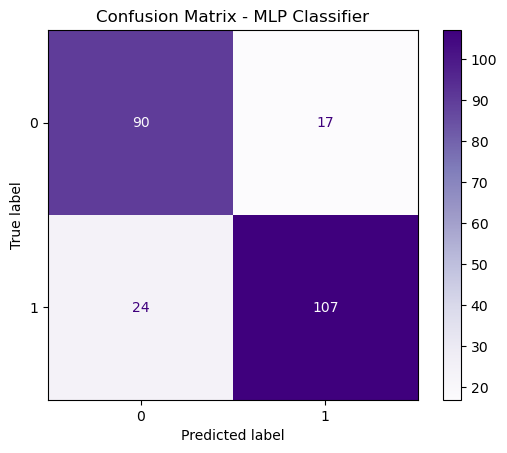

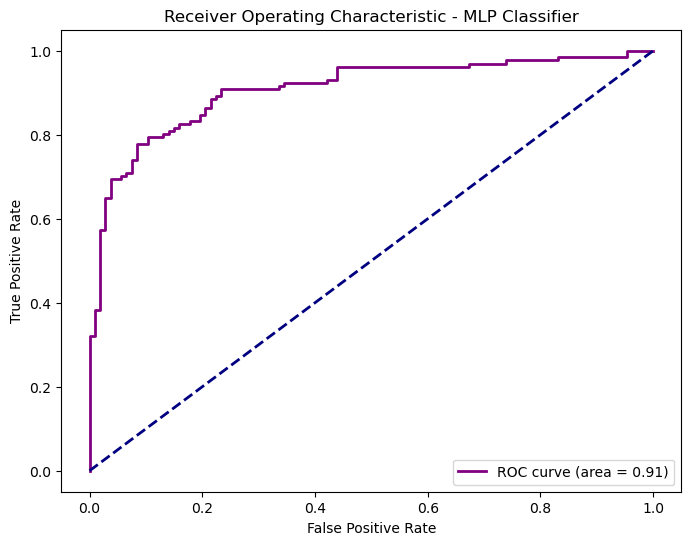

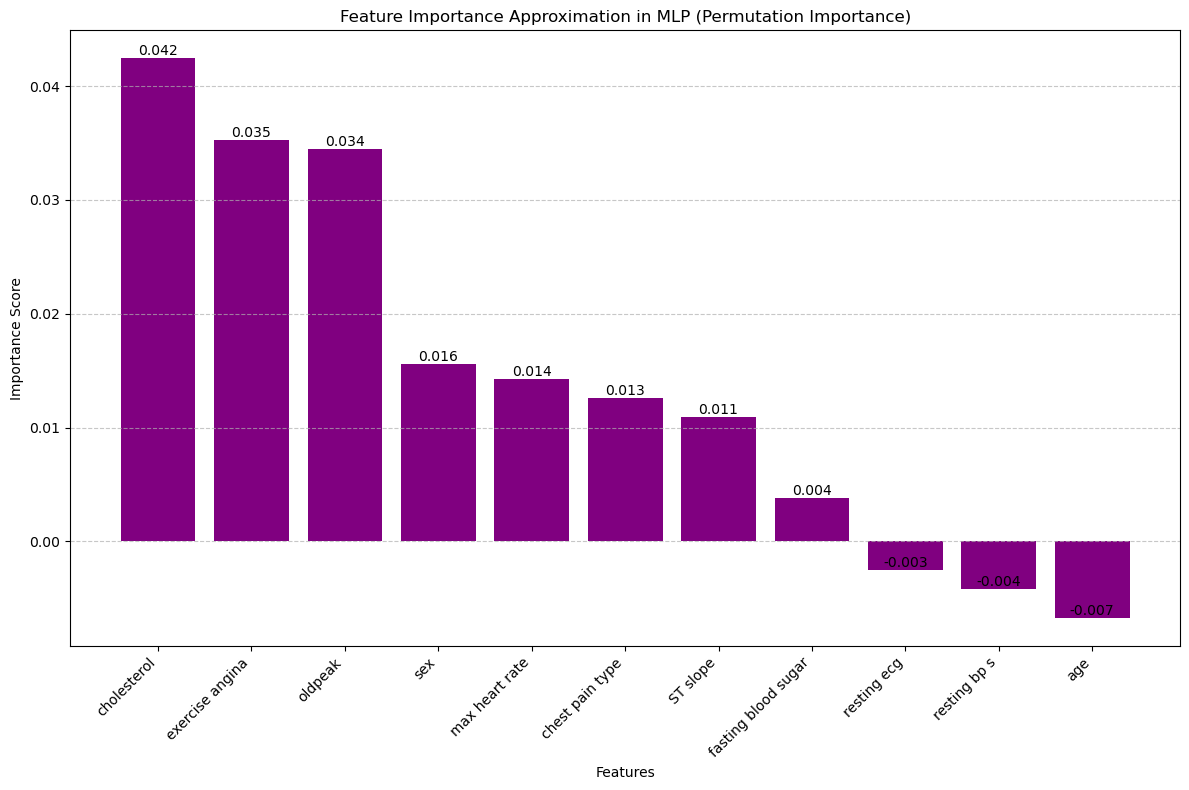

In [29]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Initialize the MLP Classifier with a single hidden layer of 100 neurons
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Perform 10-fold cross-validation to evaluate model stability
cross_val_scores = cross_val_score(ann_model, X_train, y_train, cv=10)
print("10-fold Cross-Validation Accuracy Scores for MLP:", cross_val_scores)
print("Average CV Score:", cross_val_scores.mean())

# Fit the model on the full training dataset
ann_model.fit(X_train, y_train)

# Making predictions on the test dataset
ann_predictions = ann_model.predict(X_test)


# Calculate Training and Test Accuracy
train_accuracy = ann_model.score(X_train, y_train)
test_accuracy = ann_model.score(X_test, y_test)

# Print Accuracy Results
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")


# Evaluate the model using classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, ann_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, ann_predictions))

# Visualizing the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, ann_predictions, cmap=plt.cm.Purples)
plt.title('Confusion Matrix - MLP Classifier')
plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/Confusion Matrix/MLP Classifier')
plt.show()

# Calculate and plot ROC curve to evaluate the model's performance
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_model.predict_proba(X_test)[:, 1])
roc_auc_ann = auc(fpr_ann, tpr_ann)
plt.figure(figsize=(8, 6))
plt.plot(fpr_ann, tpr_ann, color='purple', lw=2, label=f'ROC curve (area = {roc_auc_ann:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - MLP Classifier')
plt.legend(loc="lower right")
plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/ROC Curve/MLP Classifier')
plt.show()

# Approximate Feature Importance for MLP using Permutation Importance
perm_importance = permutation_importance(ann_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
feature_importance = pd.DataFrame(perm_importance.importances_mean, index=X_train.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Visualizing Feature Importance with Value Labels
plt.figure(figsize=(12, 8))
bars = plt.bar(feature_importance.index, feature_importance['Importance'], color='purple')

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.title('Feature Importance Approximation in MLP (Permutation Importance)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  

plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/Feature Importance/MLP Classifier')
plt.show()


10-fold Cross-Validation Accuracy Scores for Decision Tree: [0.8125     0.79166667 0.81052632 0.82105263 0.74736842 0.8
 0.73684211 0.82105263 0.73684211 0.75789474]
Average CV Score: 0.7835745614035086
Training Accuracy: 0.846
Test Accuracy: 0.824
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       107
           1       0.84      0.83      0.84       131

    accuracy                           0.82       238
   macro avg       0.82      0.82      0.82       238
weighted avg       0.82      0.82      0.82       238

Confusion Matrix:
 [[ 87  20]
 [ 22 109]]


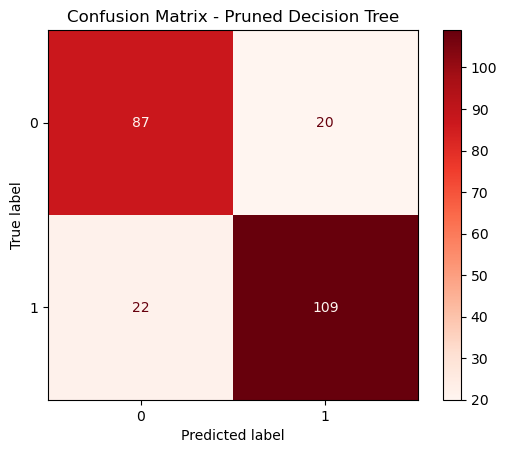

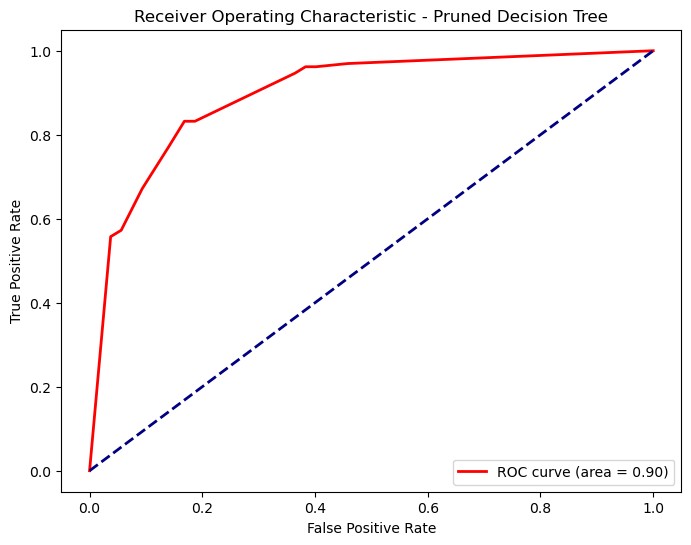

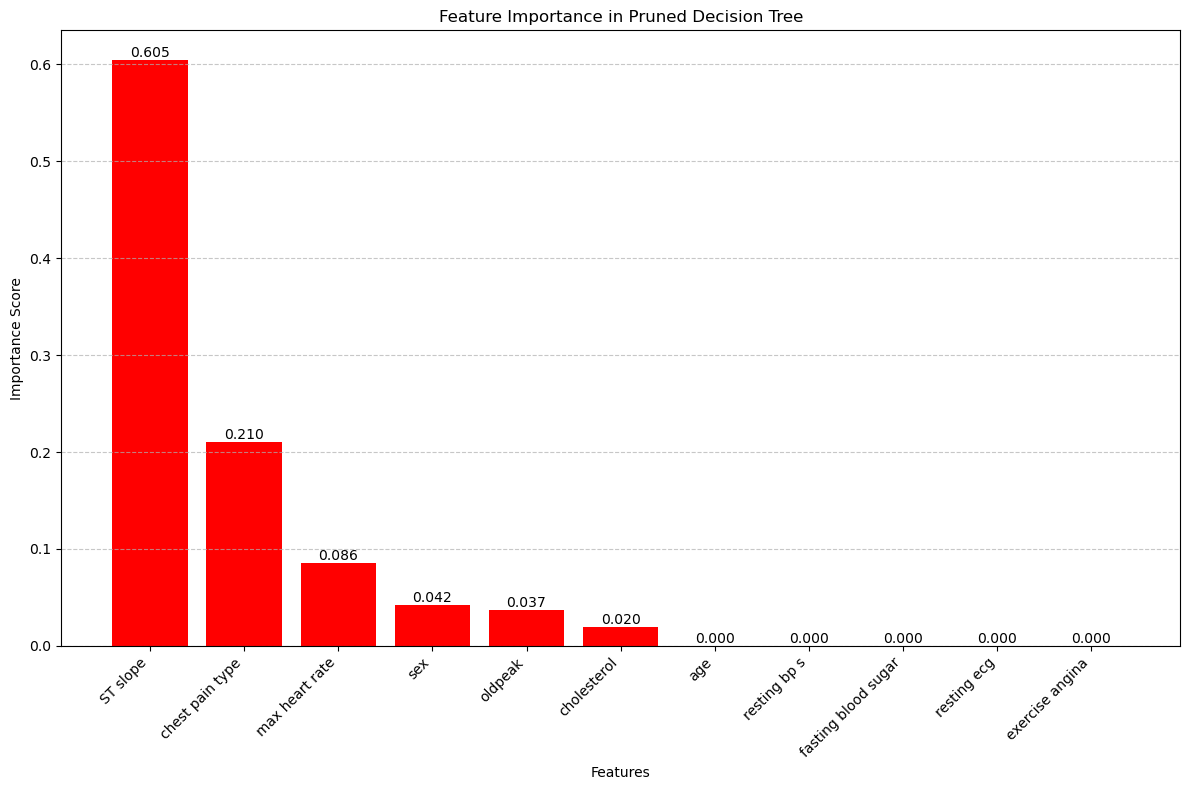

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier with Pruning Parameters
tree_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,               # Restrict tree depth to prevent overfitting
    min_samples_split=10,       # Require at least 10 samples to split a node
    min_samples_leaf=5,         # Require at least 5 samples per leaf
    ccp_alpha=0.005             # Post-pruning to remove insignificant branches
)

# Perform 10-fold cross-validation to evaluate model stability
cross_val_scores = cross_val_score(tree_model, X_train, y_train, cv=10)
print("10-fold Cross-Validation Accuracy Scores for Decision Tree:", cross_val_scores)
print("Average CV Score:", cross_val_scores.mean())

# Fit the model on the full training dataset
tree_model.fit(X_train, y_train)

# Making Predictions on the Test Dataset
tree_predictions = tree_model.predict(X_test)

# Calculate Training and Test Accuracy
train_accuracy = tree_model.score(X_train, y_train)
test_accuracy = tree_model.score(X_test, y_test)

# Print Accuracy Results
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Evaluate the Model Using Classification Report and Confusion Matrix
print("Classification Report:\n", classification_report(y_test, tree_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_predictions))

# Visualizing the Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, tree_predictions, cmap=plt.cm.Reds)
plt.title('Confusion Matrix - Pruned Decision Tree')
plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/Confusion Matrix/Decision Tree Classifier')
plt.show()

# Calculate and Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Pruned Decision Tree')
plt.legend(loc="lower right")
plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/ROC Curve/Decision Tree Classifier')
plt.show()

# Extract and Visualize Feature Importance from the Decision Tree Model
feature_names = X_train.columns  # Assuming X_train is a DataFrame
feature_importance = pd.DataFrame(tree_model.feature_importances_, index=feature_names, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)  # Sorting in descending order

# Visualizing Feature Importance with Value Labels
plt.figure(figsize=(12, 8))
bars = plt.bar(feature_importance.index, feature_importance['Importance'], color='red')

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.title('Feature Importance in Pruned Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  

plt.savefig('/Users/enoshandevchandra/Documents/*SE/Year 3/Semester 2/CO3722 - Data Science/Assessment/Visualization/Feature Importance/Decision Tree Classifier')
plt.show()
